In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
arr = np.array([[0, 0],
                     [4, 0],
                     [4, 2],
                     [0, 2]])

def plot_shape(original, transformed, title):
    plt.figure(figsize=(8, 6))

    plt.plot(np.append(original[:, 0], original[0, 0]),
             np.append(original[:, 1], original[0, 1]),
             'b--', label='Original')

    plt.plot(np.append(transformed[:, 0], transformed[0, 0]),
             np.append(transformed[:, 1], transformed[0, 1]),
             'r-', label='Transformed')
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.show()






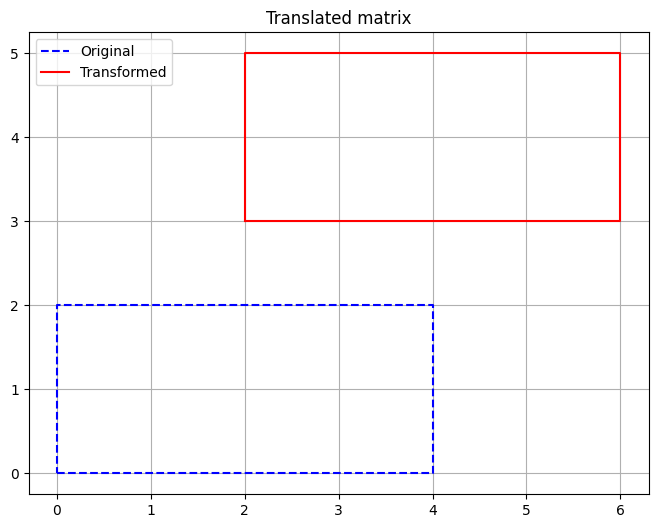

In [13]:

translated = np.zeros_like(arr)

for i in range(len(arr)):
    translated[i][0] = arr[i][0] + 2
    translated[i][1] = arr[i][1] + 3

plot_shape(arr, translated, "Translated matrix")

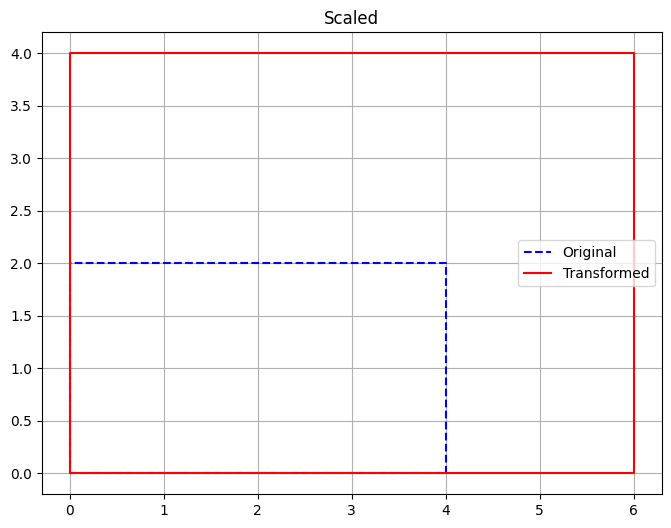

In [14]:
# arr = np.array([[0, 0],
#                      [4, 0],
#                      [4, 2],
#                      [0, 2]])
# scaling_matrix = np.array([[1.5, 0, 0],
#                               [0, 2, 0],
#                               [0, 0, 1]])
    
# arr = np.hstack((arr, np.ones((arr.shape[0], 1))))
# scaled = np.dot(arr, scaling_matrix.T)
# plot_shape(arr, scaled, "Scaling (sx=1.5, sy=2)")

scaled = np.zeros_like(arr)

scaled[0][0] = arr[0][0]
scaled[0][1] = arr[0][1]
scaled[1][0] = arr[1][0] * 1.5
scaled[1][1] = arr[1][1]
scaled[2][0] = arr[2][0] * 1.5
scaled[2][1] = arr[2][1] * 2
scaled[3][0] = arr[3][0]
scaled[3][1] = arr[3][1] * 2

plot_shape(arr, scaled, "Scaled")

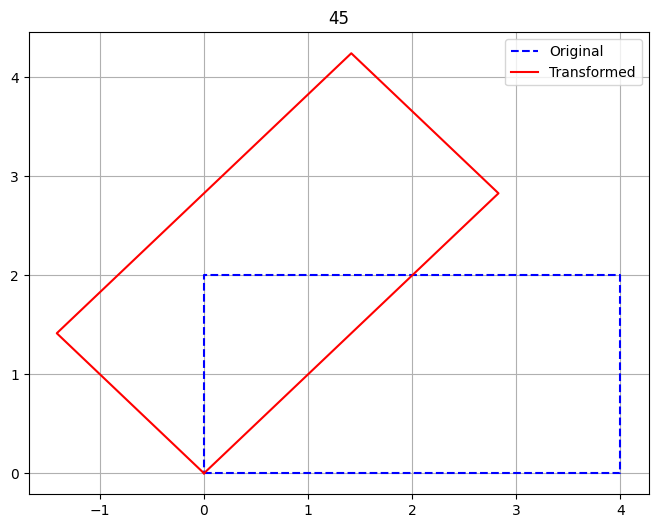

In [15]:
arr = np.array([[0, 0],
                     [4, 0],
                     [4, 2],
                     [0, 2]])

angle = 3.141/4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                               [np.sin(angle), np.cos(angle), 0],
                               [0, 0, 1]])
    
newArr = np.hstack((arr, np.ones((arr.shape[0], 1))))

rotated = np.dot(newArr, rotation_matrix.T)
plot_shape(arr, rotated, 45)

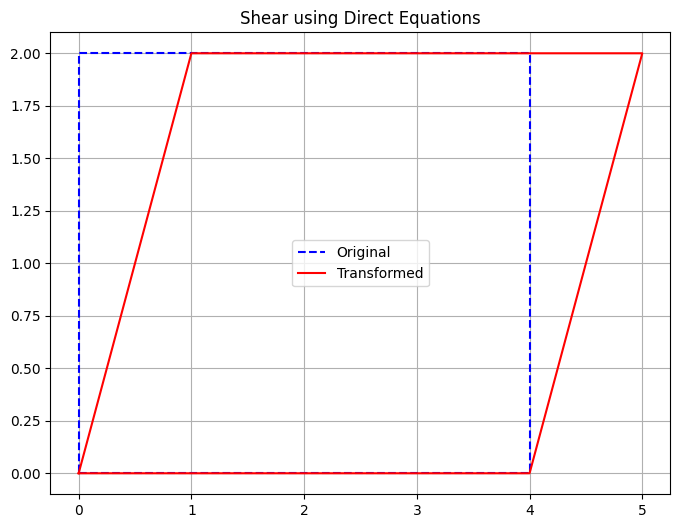

In [16]:
def shear_math(points, shx=0, shy=0):
    transformed = np.zeros_like(points)
    for i in range(len(points)):
        transformed[i, 0] = points[i, 0] + points[i, 1] * shx
        transformed[i, 1] = points[i, 0] * shy + points[i, 1]
    return transformed

sheared = shear_math(arr, 0.5, 0)
plot_shape(arr, sheared, "Shear using Direct Equations")


In [5]:
import numpy as np
import cv2 as cv
img = cv.imread('Lab1.png', 0)
rows, cols = img.shape

reflection = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
reflected_img = cv.warpPerspective(img, reflection,
                                   (int(cols),
                                    int(rows)))
cv.imshow('reflected', reflected_img)

cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
# rotation = np.float32([[1,  0, 0], [0, -1, rows], [0,  0, 1]])
img_rotation = cv.warpAffine(img,
                             cv.getRotationMatrix2D((cols/2, rows/2),
                                                    30, 0.6),
                             (cols, rows))
cv.imshow('rotated', img_rotation)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
img_enlarged = cv.resize(img, None,
                         fx=1.5, fy=1.5,
                         interpolation=cv.INTER_CUBIC)
cv.imshow('img', img_enlarged)
cv.waitKey(0)
cv.destroyAllWindows()

: 

In [4]:
cropped_img = img[100:400, 100:300]
cv.imshow('image', cropped_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [21]:
X_axis = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
sheared_img = cv.warpPerspective(img, X_axis, (int(cols*1.5), int(rows*1.5)))
cv.imshow('img', sheared_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [22]:
Y_axis = np.float32([[1,   0, 0], [0.5, 1, 0], [0,   0, 1]])
sheared_img = cv.warpPerspective(img, Y_axis, (int(cols*1.5), int(rows*1.5)))
cv.imshow('sheared_y-axis', sheared_img)
cv.waitKey(0)
cv.destroyAllWindows()

: 